In [1]:
""" ▶ Step 0. Data Augmentation """
"""

"""

'\n\n'


(50000, 32, 32, 3) (50000, 1)


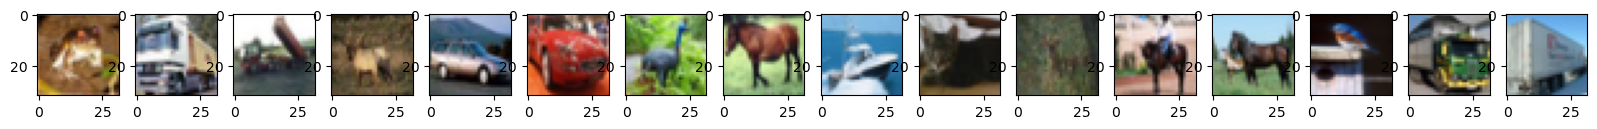

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import cifar10

# 1. 데이터 로드 및 확인.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)

plt.figure(figsize=(20,2))
for i  in range(0,16):
    plt.subplot(1, 16, i+1 )
    plt.imshow( x_train[i] , cmap ='gray')

In [3]:
''' 0 airplane, 1 automobile, 2 bird, 3 cat, 4 deer, 5 dog, 6 frog, 7 horse, 8 ship, 9 truck '''
# 2.라벨링 원핫 인코딩    / one - hot 벡터화  
y_train   = tf.keras.utils.to_categorical(y_train.astype('int32'), 10 ) 
y_test    = tf.keras.utils.to_categorical(y_test.astype('int32'), 10 ) 
print(y_train[0], y_train.shape)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] (50000, 10)


In [4]:
# 3. 정수형 이미지 데이터를 float으로 변환 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
# 4. tf.image 변환을 적용하는 함수 선언

from tensorflow.image import random_flip_left_right, random_flip_up_down, random_brightness, random_contrast, random_crop

def augment(image, label):
    image = random_flip_left_right(image)    # 무작위로 이미지 좌우로 뒤집기
    image = random_flip_up_down(image)       # 상하 뒤집기
    image = random_brightness(image, max_delta=0.1)        # 이미지 밝기 조절
    image = random_contrast(image, lower=0.9, upper=1.1)   # 대비 조절
    
    return image, label